# 2. EDA: Exploracion de los datos
En esta seccion, examinamos la composicion de las variables y algunas de sus relaciones. Lo hacemos en dos partes. Primero, nos concentramos en el subconjunto de datos alimenta nuestras consultas sobre peliculas. Segundo, terminamos con en subconjunto de datos que alimenta las consultas sobre director.

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data_mvp_funciones = pd.read_csv(os.path.join('D:\Bootcamp\Henry\CURSO\Proyecto Individual 1\Movies\Output','data_mvp_final_funciones.csv'),index_col=0).convert_dtypes()
data_mvp_exitodir = pd.read_csv(os.path.join('D:\Bootcamp\Henry\CURSO\Proyecto Individual 1\Movies\Output','data_mvp_final_funciones_exitodir.csv'),index_col=0).convert_dtypes()
data_mvp_ml = pd.read_csv(os.path.join('D:\Bootcamp\Henry\CURSO\Proyecto Individual 1\Movies\Output','data_mvp_final_ml.csv'),index_col=0).convert_dtypes()

## 2.1 EDA: Subconjunto de datos que alimenta las consultas sobre peliculas

In [6]:
# el primer subconjunto de datos: funciones
data_mvp_funciones.info()
data_mvp_funciones.head(2)

<class 'pandas.core.frame.DataFrame'>
Index: 59545 entries, 0 to 310039
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           59545 non-null  Int64  
 1   title              59545 non-null  string 
 2   original_language  59545 non-null  string 
 3   runtime            59545 non-null  Int64  
 4   release_date       59545 non-null  string 
 5   franquicia         59545 non-null  string 
 6   budget             59545 non-null  Int64  
 7   revenue            59545 non-null  Int64  
 8   pais_name          59545 non-null  string 
 9   productora         59545 non-null  string 
 10  director           59545 non-null  string 
 11  return             18931 non-null  Float64
 12  release_year       59545 non-null  Int64  
dtypes: Float64(1), Int64(5), string(7)
memory usage: 6.7 MB


,movie_id,title,original_language,runtime,release_date,franquicia,budget,revenue,pais_name,productora,director,return,release_year
0,862,Toy Story,en,81,1995-10-30,Toy Story Collection,30000000,373554033,United States of America,Pixar Animation Studios,John Lasseter,12.451801,1995
12,8844,Jumanji,en,104,1995-12-15,Sin franquicia,65000000,262797249,desconocido,desconocido,Joe Johnston,4.043035,1995


 Primero clasificamos las variables en dos grupos:
- cualitativas categoricas
- cuantitativas (numericas)

Nuestra primary key es `pelicula_id`; por tanto, esta no la clasificamos.

Las variables `release_date` y `release_year` son redundantes; por este motivo, excluimos `release_date` del EDA.

In [7]:
# variables cualitativas categoricas
vars_cat=[
    'title',
    'original_language',
    'franquicia',
    'pais_name',
    'productora',
    'director']

# cuantitativas (numericas)
vars_num=[
    'runtime',
    'budget',
    'revenue',
    'return',
    'release_year' # consideramos año como una variable numerica, para facilitar la evaluacion de anomalias.
    ]

data_mvp_funciones_ord=data_mvp_funciones.loc[:,['movie_id']+vars_cat].drop_duplicates()
data_mvp_funciones_num=data_mvp_funciones.loc[:,['movie_id']+vars_num].drop_duplicates()

### 2.1.1. Datos invalidos (outliers) en variables numericas

En esta seccion evaluamos la existencia de valores invalidos en nuestra base de datos. Una estrategia comun en el area tecnologica es identificar valores invalidos a traves de estrategias comunmente empleadas para la identificar valores atipicos o outliers. Sin embargo, en ciencias sociales y naturales el consenso es que los valores atípicos no deben ser excluidos/removidos siempre y cuando no exista evidencia que son inválidos. Es decir, una vez se confirma que un determinado valor no es invalido, el consenso científico señala que los valores atípicos hacen parte de la población y, por tanto, no deben ser excluidos (ver [referencia](https://www.quantics.co.uk/blog/outliers/)); p. ej., siempre existirán personas que midan 2.6m o personas que vivan 105 años. Los fenómenos naturales y sociales incluyen valores extremos muy alejados de la media que hace parte de la población; de ahi su nombre 'atípico', donde lo 'típico' es el caso central (media).

Por tal motivo, en esta sección evaluamos manualmente si existen anomalías en la información con el fin de removerlos. En resumen, si bien encontramos valores atipicos tambien concluimos que la mayoria de los valores atipicos NO constituyen datos invalidos que deban ser imputados o removidos. El unico caso son peliculas con runtime de 0. 

In [8]:
# caracteristicas de los datos
data_mvp_funciones_num.info()
data_mvp_funciones_num.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 45346 entries, 0 to 310039
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie_id      45346 non-null  Int64  
 1   runtime       45346 non-null  Int64  
 2   budget        45346 non-null  Int64  
 3   revenue       45346 non-null  Int64  
 4   return        10898 non-null  Float64
 5   release_year  45346 non-null  Int64  
dtypes: Float64(1), Int64(5)
memory usage: 2.7 MB


movie_id            0
runtime             0
budget              0
revenue             0
return          34448
release_year        0
dtype: int64

In [9]:
# no observamos anomalias en la columna de año; vale la pena aclarar, que el cine de invento a principios del XIX
print(data_mvp_funciones_num[['release_year']].min())
print(data_mvp_funciones_num[['release_year']].max())

release_year    1874
dtype: Int64
release_year    2020
dtype: Int64


In [10]:
print(data_mvp_funciones_num[['runtime']].min()) # consideramos los valores 0 como invalidos.
print(data_mvp_funciones_num[['runtime']].max()) # evaluamos en detalle los valores altos

runtime    0
dtype: Int64
runtime    1256
dtype: Int64


In [11]:
# reemplazamos los valores = 0, con el mediana de la base de datos;
# escogemos la mediana por que es mas resistente a valores extremos.
print("Mediana (runtime):",data_mvp_funciones_num['runtime'].median())
data_mvp_funciones_num['runtime'].loc[data_mvp_funciones_num['runtime']==0] = data_mvp_funciones_num['runtime'].median()
print(data_mvp_funciones_num[['runtime']].min())
print(data_mvp_funciones_num[['runtime']].max())

Mediana (runtime): 95.0
runtime    1
dtype: Int64
runtime    1256
dtype: Int64


C:\Users\Losse\AppData\Local\Temp\ipykernel_34576\683804697.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_mvp_funciones_num['runtime'].loc[data_mvp_funciones_num['runtime']==0] = data_mvp_funciones_num['runtime'].median()


In [12]:
# usamos la siguiente estrategia para identificar valores invalidos:
# el z-score (3 sigmas), la cual es comunmente empleada para identificar
# valores atipicos o outliers de una poblacion.
def outliers_zscore(x):
    z_score = np.abs((x - np.mean(x)) / np.std(x))
    return z_score > 3

In [13]:
# empleamos el z-score por año; es decir, consideramos que cada año constitute un poblacion distinta de peliculas
data_mvp_funciones_num[['runtime_outlier']]=data_mvp_funciones_num.groupby(['release_year'])[['runtime']].transform(outliers_zscore)

# en el resultado de abajo se puede observar que son muchas observaciones por año que pueden considerarse casos atipicos.
# nuevamente, los casos atpicos es algo inherente a cualquier poblacion, incluyendo poblaciones con una distribucion normal.
data_mvp_funciones_num[['release_year','runtime']].loc[data_mvp_funciones_num['runtime_outlier']==1].value_counts()

d:\Bootcamp\Henry\CURSO\Proyecto Individual 1\Movies\fastapienv\lib\site-packages\numpy\_core\fromnumeric.py:3800: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
d:\Bootcamp\Henry\CURSO\Proyecto Individual 1\Movies\fastapienv\lib\site-packages\numpy\_core\fromnumeric.py:3800: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
d:\Bootcamp\Henry\CURSO\Proyecto Individual 1\Movies\fastapienv\lib\site-packages\numpy\_core\fromnumeric.py:3800: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this w

release_year  runtime
2012          7          6
2013          7          5
1952          7          4
1953          7          4
2016          7          4
                        ..
2017          12         1
              195        1
              235        1
              240        1
              432        1
Name: count, Length: 540, dtype: int64

In [14]:
# procedemos a la inspeccion de valores atipicos.
# con respecto a los valores mas altos, En https://en.wikipedia.org/wiki/List_of_longest_films
# se puede observar que estos datos no consistuyen valores invalidos de runtime.
data_mvp_funciones_num[['release_year','runtime']].loc[data_mvp_funciones_num['runtime_outlier']==1].sort_values(['runtime'], ascending=False)

,release_year,runtime
226979,1978,1256
296392,1994,1140
196514,2001,1140
149249,1980,931
150430,1984,925
...,...,...
297280,2004,1
283569,2013,1
284737,1958,1
177374,1989,1


In [15]:
# para facilitar nuestro analisis nos concentramos unicamente en aquellos casos donde el valor atipico es 1;
# es decir, en aquellos años donde solo existe un caso atipico segun el criterio de los 3 sigmas
data_mvp_funciones_num_outlier_year=data_mvp_funciones_num[['release_year']].loc[data_mvp_funciones_num['runtime_outlier']==1].value_counts()[
    data_mvp_funciones_num[['release_year']].loc[data_mvp_funciones_num['runtime_outlier']==1].value_counts()==1]#.index
outlier_years=list(pd.DataFrame(data_mvp_funciones_num_outlier_year).reset_index()['release_year'])

data_mvp_funciones_num[['release_year','runtime']].loc[
    (data_mvp_funciones_num['runtime_outlier']==1) &
    (data_mvp_funciones_num['release_year'].isin(outlier_years))
    ].sort_values(['runtime'], ascending=False)

,release_year,runtime
189230,1990,680
203511,1964,485
175705,1914,410
149634,1915,399
130355,1927,332
299677,1935,306
182987,1916,300
179422,1934,281
166383,1923,273
189805,1942,270


In [16]:
# Tras inspeccionar le fuente de nuestra base de datos (IMDB)
# observamos que la serie Civil War de 1990 tiene un runtime de 680min
# ver: https://www.imdb.com/title/tt0098769/?ref_=adv_li_tt

# con base en lo anterior concluimos que no existen datos invalidos en nuestra base de datos,
# con excepcion de aquellos con runtime de 0min mencionados anteriormente.

### 2.1.2. Exploracion de datos: Peliculas exitosas

En esta seccion, exploramos los datos relacionados con las peliculas. Una de consultas esta relacionadas con el exito del director medido por medio la relación entre ingresos y costos de producccion. Pero, ¿qué tan existosos son los directores segun nuestra base de datos? Es decir, ¿qué resultados esperamos encontrar cuando realicemos las consultas a traves del API?

Una manera de sintetizar la la rentabilidad de peliculas es atraves de una grafico de dispersion entre costos de produccion (eje x) y su relacion con recaudacion (eje y). Trazamo una linea diagonal para visualizar que tan rentable es una pelicula; si esta arriba de la linea diagonal, es rentable; si se encuentra abajo de la linea diagonal, no es rentable.

Como los datos esta en precios corrientes, estan sujetos a cambios drasticos por la inflacion. Esto afectaria la interpretacion de una grafico de dispersion, peusto que estaria altamente sesgado en favor de las peliculas mas recientes (ademas de los efecots adicionales debido a los cambios en el tamano de las producciones). Para reducir los efectos de las inflacion y facilitar la interpretacion de nuestro grafico, reportamos los datos en precios corriente en su log natural.

In [17]:
# nos concentramos en la rentabilidad de las peliculas

data_mvp_funciones_num_plot=data_mvp_funciones_num[['movie_id','budget','revenue',]].loc[
    data_mvp_funciones_num['return']!=0].drop_duplicates()

# sumamos 1 a todas las para garantizar que el log natural de un resultado mayor a 1; es decir, numeros reales.
data_mvp_funciones_num_plot[['budget_log']] = 1 + np.log(data_mvp_funciones_num_plot[['budget']])
data_mvp_funciones_num_plot[['revenue_log']] = 1 + np.log(data_mvp_funciones_num_plot[['revenue']])

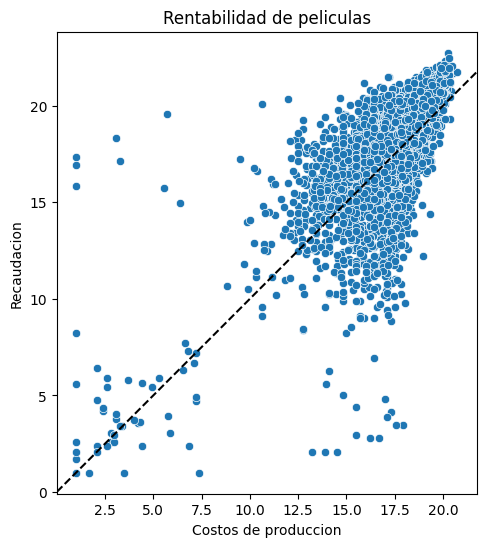

In [18]:
# definimos tamaño de plot
plt.figure(figsize=(6, 6))
sns.scatterplot(data=data_mvp_funciones_num_plot, x='budget_log', y='revenue_log')
plt.axline((1, 1), slope=1,linestyle='dashed', color='black')
plt.title("Rentabilidad de peliculas")
plt.xlabel("Costos de produccion")
plt.ylabel("Recaudacion")
plt.gca().set_aspect('equal')

El grafico nos muestra que las peliculas estan relativamente bien distribuidas con respecto a su rentabilidad; es decir, que no todos los casos estan concentrados arriba de la linea diagonal, sino que tambien una gran parte de las peliculas que no son rentables (debajo de la linea diagonal). Por tanto, esperamos que las consultas arrojen un numero igual de resultados con retornos mayores a 1; es decir, peliculas que son rentables.

### 2.1.3. Exploracion de datos: Ranking de paises por produccion
Nos concentramos en los paises de produccion. Para esto, visualizamos un ranking de pasis. ¿Cuáles son los paises en donde se producen la mayor cantidad de peliculas?

In [19]:
# realizamos un ranking de paises por cantidad de peliculas producidas
data_mvp_funciones_num_plot2=data_mvp_funciones_num[['movie_id']].drop_duplicates()
data_mvp_pais_2join=data_mvp_funciones.loc[:,['movie_id','pais_name']].drop_duplicates()
data_mvp_funciones_num_plot2=data_mvp_funciones_num_plot2.merge(data_mvp_pais_2join,on=['movie_id'])
data_mvp_pais_rank = data_mvp_funciones_num_plot2.groupby('pais_name')['movie_id'].count().reset_index()
data_mvp_pais_rank.columns = ['pais', 'cantidad_peliculas']
data_mvp_pais_rank = data_mvp_pais_rank.sort_values(by='cantidad_peliculas', ascending=False)
data_mvp_pais_rank.head()

,pais,cantidad_peliculas
69,desconocido,41105
68,United States of America,2570
29,Japan,413
67,United Kingdom,370
17,France,256


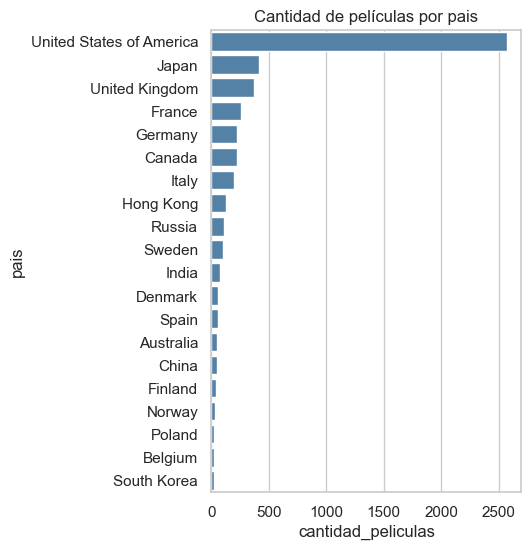

In [20]:
# el resultado de arriba muestra que la mayor parte de las peliculas se producieron en un pais desconocido.
# por tal motivo, excluimos estos valores para facilitar la visualizacion de nuestro ranking de paises.
data_mvp_pais_rank=data_mvp_pais_rank.loc[data_mvp_pais_rank['pais']!='desconocido']

# definimos estilo de plot
sns.set(style="whitegrid")
# seleccionamos los 10 directores con más cantidad de películas
df_pais = data_mvp_pais_rank.nlargest(20, 'cantidad_peliculas')
# definimos tamaño
plt.figure(figsize=(4, 6))
# creamos el gráfico
ax = sns.barplot(
    y='pais',
    x='cantidad_peliculas',
    data=df_pais,
    color='steelblue',
    orient='h')
# añadimos título
plt.title('Cantidad de películas por pais')
# mostramos el gráfico
plt.show()

El grafico de arriba muestra claramente que Estados Unidos es el pais de mayor produccion, seguido de Japon y UK. Por tanto, esperamos que las consultas arrojen en la mayoria de los casos a Estados Unidos como el pais donde se produjo la pelicula.

## 2.2 EDA: Subconjunto de datos que alimenta la funcion de director

### 2.2.1. Anomalias en los datos

In [21]:
# identificamos anomalias en los datos de director.
data_mvp_exitodir[['director_return_outlier']]=data_mvp_exitodir[['director_return']].transform(outliers_zscore)
index_exitodir_return=data_mvp_exitodir[['director','director_budget','director_revenue','director_return']].loc[data_mvp_exitodir['director_return_outlier']==1].index
data_mvp_exitodir[['director','director_budget','director_revenue','director_return']].loc[data_mvp_exitodir['director_return_outlier']==1].drop_duplicates()

,director,director_budget,director_revenue,director_return
8695,Marek Kanievska,1,12396383,12396383.0
10470,Park Kwang-hyun,8,33579813,4197476.625
10505,Patricia Martínez de Velasco,1,2755584,2755584.0


In [22]:
# con base en lo anterior, consideramos que estos datos son invalidos
# no encontramos evidencia que una pelicula con un presupuesto de USD$1 haya generado esta recaudacion.
# por tal motivo, removemos estos valores invalidos de nuestra base de datos
data_mvp_exitodir=data_mvp_exitodir.loc[~data_mvp_exitodir.index.isin(index_exitodir_return)]

### 2.2.2. Exploracion de datos: Directores mas productivos

En esta seccion, exploramos los datos relacionados con los directores. Una de consultas esta relacionadas con el exito del director medido por medio la relación entre ingresos y costos de producccion. Pero, ¿qué tan existosos son los directores en nuestros datos?

In [23]:
data_mvp_exitodir.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18608 entries, 0 to 18613
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   director                 18608 non-null  string 
 1   director_revenue         18608 non-null  Int64  
 2   director_budget          18608 non-null  Int64  
 3   director_return          18608 non-null  Float64
 4   movie_id                 18608 non-null  Int64  
 5   title                    18608 non-null  string 
 6   release_date             18608 non-null  string 
 7   release_year             18608 non-null  Int64  
 8   budget                   18608 non-null  Int64  
 9   revenue                  18608 non-null  Int64  
 10  return                   8166 non-null   Float64
 11  director_return_outlier  18608 non-null  boolean
dtypes: Float64(2), Int64(6), boolean(1), string(3)
memory usage: 1.9 MB


In [24]:
# realizamos un ranking de directores por cantidad de peliculas producidas
data_mvp_exitodir_plot2=data_mvp_exitodir[['director']].drop_duplicates()
data_mvp_exitodir_2join=data_mvp_exitodir.loc[:,['director','movie_id']].drop_duplicates()
data_mvp_exitodir_plot2=data_mvp_exitodir_plot2.merge(data_mvp_exitodir_2join,on=['director'])
data_mvp_exitodir_rank = data_mvp_exitodir_plot2.groupby('director')['movie_id'].count().reset_index()
data_mvp_exitodir_rank.columns = ['director', 'cantidad_peliculas']
data_mvp_exitodir_rank = data_mvp_exitodir_rank.sort_values(by='cantidad_peliculas', ascending=False)
data_mvp_exitodir_rank.head()

,director,cantidad_peliculas
2609,desconocido,3065
1185,John Ford,68
1651,Michael Curtiz,65
84,Alfred Hitchcock,53
2579,Woody Allen,49


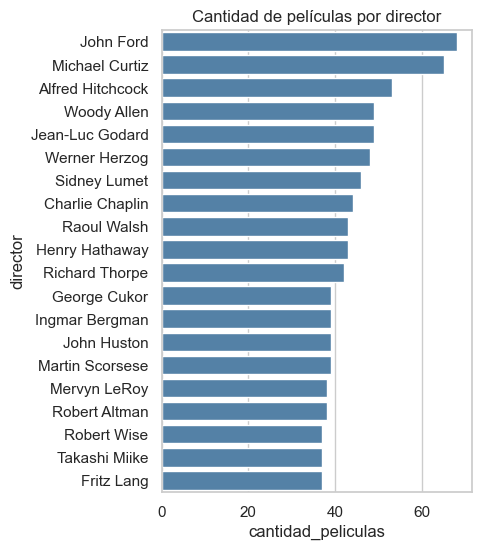

In [25]:
# el resultado de arriba muestra que la mayor parte de las peliculas se tiene director desconocido.
# por tal motivo, excluimos estos valores para facilitar la visualizacion de nuestro ranking de director.
data_mvp_exitodir_rank=data_mvp_exitodir_rank.loc[data_mvp_exitodir_rank['director']!='desconocido']

# definimos estilo de plot
sns.set(style="whitegrid")
# seleccionamos los 10 directores con más cantidad de películas
df_dir=data_mvp_exitodir_rank.nlargest(20, 'cantidad_peliculas')
# definimos tamaño
plt.figure(figsize=(4, 6))
# creamos el gráfico
ax = sns.barplot(
    y='director',
    x='cantidad_peliculas',
    data=df_dir,
    color='steelblue',
    orient='h')
# añadimos título
plt.title('Cantidad de películas por director')
# mostramos el gráfico
plt.show()

El grafico de arriba que son varios los directores con un enorme portafolio. Por tanto, esperamos que las consultas de director existan resultados con un amplio numero de peliculas; por ejemplo, Woody Allen arrojaria la informacion sobre cerca de 50 producciones.

### 2.2.3. Exploracion de datos: Directores exitosos

In [26]:
# adoptamos la misma estrategia que para el caso de las peliculas
data_mvp_exitodir_plot=data_mvp_exitodir[
    ['director','director_budget','director_revenue']].drop_duplicates()
data_mvp_exitodir_plot[['director_budget_log']]=np.log(data_mvp_exitodir_plot[['director_budget']])+1
data_mvp_exitodir_plot[['director_revenue_log']]=np.log(data_mvp_exitodir_plot[['director_revenue']])+1

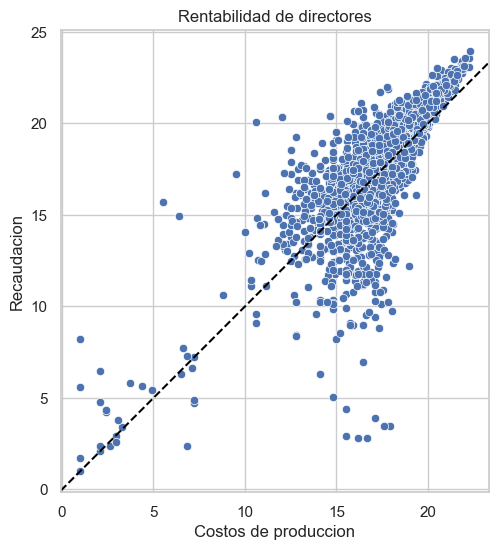

In [27]:
# definimos tamaño
plt.figure(figsize=(6, 6))
sns.scatterplot(data=data_mvp_exitodir_plot, x='director_budget_log', y='director_revenue_log')
min_limit=min(data_mvp_exitodir_plot[['director_budget']].min())
max_limit=min(data_mvp_exitodir_plot[['director_revenue']].max())
plt.axline((1, 1), slope=1,linestyle='dashed', color='black')
plt.title("Rentabilidad de directores")
plt.xlabel("Costos de produccion")
plt.ylabel("Recaudacion")
plt.gca().set_aspect('equal')

A diferencia del caso de la pelicula, para el caso de directores se puede observar gran parte de los directores realizan proyectos rentables (arriba d de la linea diagonal)